In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#carregando o dataset
df = pd.read_csv('train.csv')
data = pd.DataFrame(df)

In [3]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
data.shape

(1460, 81)

In [5]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
# as features da list lista são NaN, assim retirando do dataframe
# armazenando a feature target em y
y = data['SalePrice']
lista = ['Id', 'PoolQC', 'Alley', 'Fence', 'MiscFeature','SalePrice']

In [7]:
data.drop(lista, axis=1, inplace=True)

In [8]:
# comando que imprime todas as linhas 
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None) //mostra as colunas

In [9]:
data.head(10)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,30,0,320,0,0,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,57,0,0,0,0,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,204,228,0,0,0,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,205,0,0,0,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,4,0,0,0,0,0,1,2008,WD,Normal


In [10]:
#mostrando a qauntidade de valores faltantes em cada coluna
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

##### <p style="color:red"> O dataset ainda possui colunas com valores faltante, porém estas colunas possuem valores preenchidos que podem ser úteis no modelo. Vamos mantela por hora e futuramente analisamos se essas features são importantes no modelo e se sim, alguma forma para tratar esses dados faltante (média dos outros valores?) </p>

##### <p style="color:red"> Outro problema encontrado nas colunas é que muitas delas possuem valores que não são valores. Precisamos saber se podemos excluir este valores não numeros e gerar o modelo somente com as outras features. Por hora vamos fazer desta forma</p>

In [11]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


In [12]:
#excluindo os valores não numéricos
#data.info()

colunas = list(data.columns)
colunas = [x for x in colunas if data[x].dtype == 'O' ] #adiciona em colunas todas as features 'objetos'

data = data.drop(colunas, axis=1)


In [13]:
#verificando se ainda existem valores não numericos no dataset
data.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

In [14]:
# a feature 'LotFrontage' ,'MasVnrArea' e 'GarageYrBlt' possuem valores faltantevamos preencher utilizando 
# a média dos outros valores. Como a 'MasVnrArea' possui muitos valores faltantes, isto pode prejudicar
# o modelo.Vamos analisar e depois decidimos se excluimos essa coluna ou encontramos outra forma de 
#preencher os valores faltantes
data.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [15]:
data.shape

(1460, 36)

In [16]:
#Preenchem cada coluna com a sua respectiva média através da função 'fillna'
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())


### <p style="color:blue"> Agora que os dados estão tratados, vamos plotar gráficos para verificar quais das features restantes são mais relevantes para a criação do modelo</p>

In [25]:
#os valores do dados estão muito distintos, vamos normalizar os valores para podermos visualizar melhor nos
#plots
data.describe()
dataNormalize = (data - data.mean() )/ (data.std()) 

In [27]:
dataNormalize.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-1.548229e-16,1.011501e-14,-7.585257e-17,2.644764e-16,4.050033e-16,1.061442e-15,4.505985e-15,5.034025e-17,-1.961901e-17,-1.657730e-16,...,1.596896e-18,1.539104e-16,9.022463e-17,1.649366e-16,4.386141e-16,-7.969272e-17,-6.183600e-16,-1.173529e-16,6.681299e-17,3.563078e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.722639e-01,-2.227112e+00,-9.234128e-01,-3.687150e+00,-4.111561e+00,-3.286697e+00,-1.688790e+00,-5.742137e-01,-9.726849e-01,-2.885540e-01,...,-2.212205e+00,-7.519182e-01,-7.042419e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,-1.968437e+00,-1.367186e+00
25%,-8.722639e-01,-4.563180e-01,-2.968890e-01,-7.948791e-01,-5.170227e-01,-5.717268e-01,-8.653621e-01,-5.742137e-01,-9.726849e-01,-2.885540e-01,...,-6.476941e-01,-7.519182e-01,-7.042419e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,-4.889425e-01,-6.142282e-01
50%,-1.630536e-01,1.032389e-14,-1.040277e-01,-7.181151e-02,-5.170227e-01,5.735183e-02,4.424348e-01,-5.742137e-01,-1.318570e-01,-2.885540e-01,...,3.283304e-02,-7.519182e-01,-3.269178e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,-1.190689e-01,1.387300e-01
75%,3.097533e-01,4.063763e-01,1.086708e-01,6.512561e-01,3.816120e-01,9.513056e-01,9.268040e-01,3.354103e-01,5.889309e-01,-2.885540e-01,...,4.818406e-01,5.884489e-01,3.220798e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,6.206783e-01,8.916881e-01
max,3.146594e+00,1.103114e+01,2.051125e+01,2.820459e+00,3.077516e+00,1.282400e+00,1.217426e+00,8.286659e+00,1.140185e+01,8.848606e+00,...,4.420012e+00,6.085550e+00,7.551611e+00,8.672338e+00,1.721134e+01,8.338605e+00,1.829991e+01,3.115459e+01,2.100173e+00,1.644646e+00


In [28]:
#como sobraram 36 colunas, vamos dividir em tres grupos de 12 para facilitar a visualização
grupoFeature1 = dataNormalize.iloc[:,0:12]
grupoFeature2 = dataNormalize.iloc[:,12:24]
grupoFeature3 = dataNormalize.iloc[:,24:36]

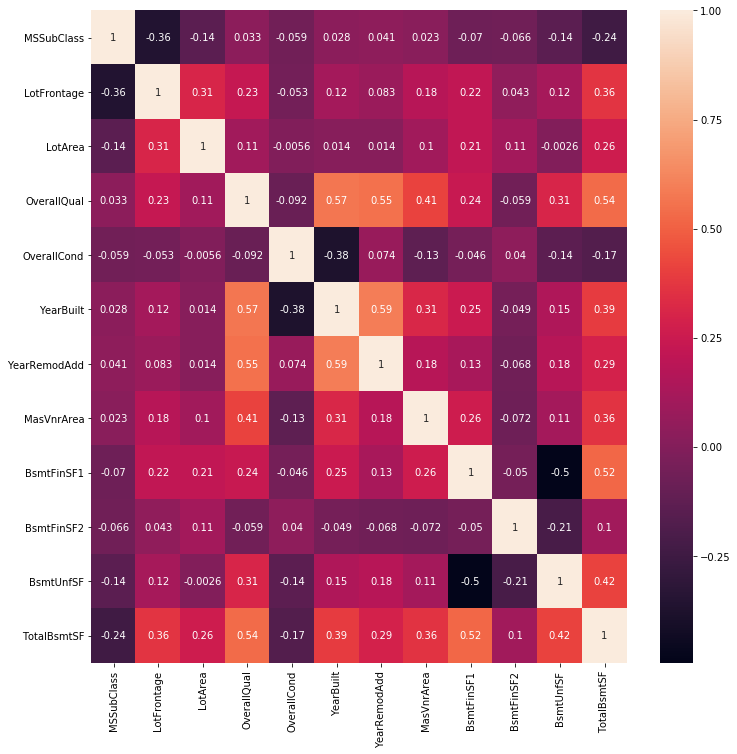

In [35]:
# este plot mostra a correlacao entre as variáveis
# 1 : positivamente correlacionadas (quando uma aumenta a outra aumenta, reta crescente)
# 0 : não relacionadas
# -1: negativamente correlacionadas (quando uma aumenta a outra diminuiu, reta decrescente)
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(grupoFeature1.corr(),annot=True)

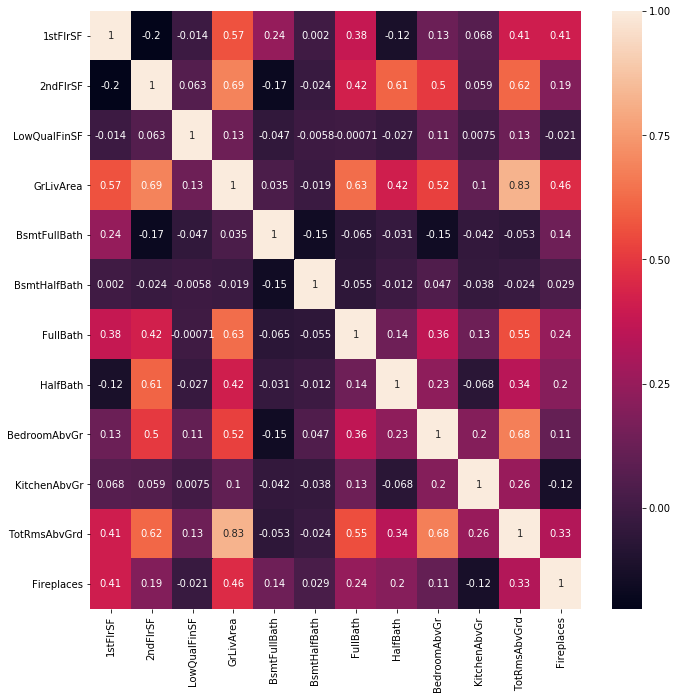

In [39]:
f, ax = plt.subplots(figsize = (11,11))
sns.heatmap(data= grupoFeature2.corr(),annot = True)

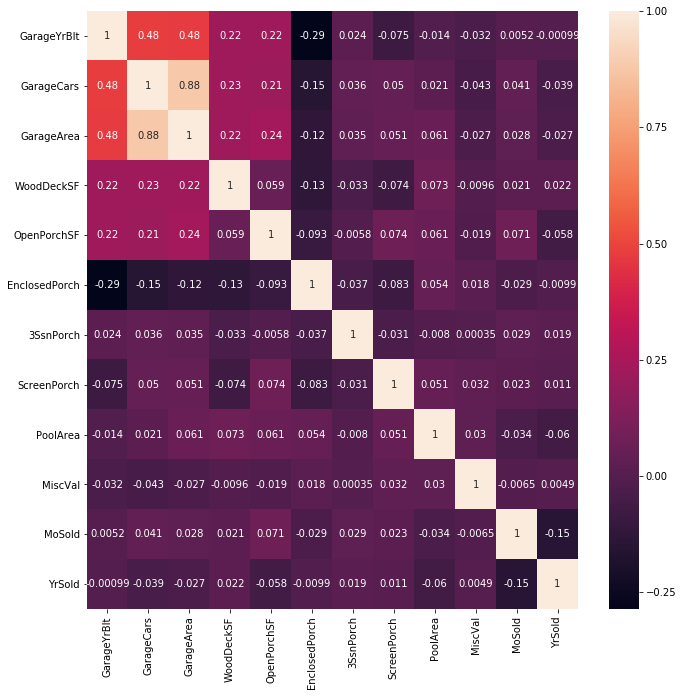

In [41]:
f, ax = plt.subplots(figsize=(11,11))
sns.heatmap(data=grupoFeature3.corr(), annot=True)

In [42]:
#dos três gráficos a unicas features que tiveram correlação significante foram as 'GarageArea'
#e 'GarageCars'. Devemos retirar umas das duas??

